# Imports

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, summation, oo

## Functions and signals

In [32]:
def u(n):
  return 1 if n >= 0 else 0

def x(n):
  a = 2/3
  return (a**n)*u(n-2)



Text(0, 0.5, 'Amplitude')

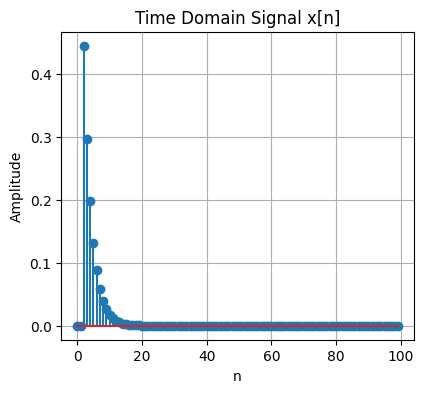

In [42]:
rng = 100
n = np.arange(rng)
x_n = np.array([x(i) for i in n])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.stem(n, x_n)
plt.grid(True)
plt.title('Time Domain Signal x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

# Time domain to z-domain convert

<ipython-input-57-1ac8c4401237>:5: RuntimeWarning: invalid value encountered in power
  return np.sum(x_n * z**(-n))
<ipython-input-57-1ac8c4401237>:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(R*np.cos(Omega), R*np.sin(Omega), np.abs(X_z))


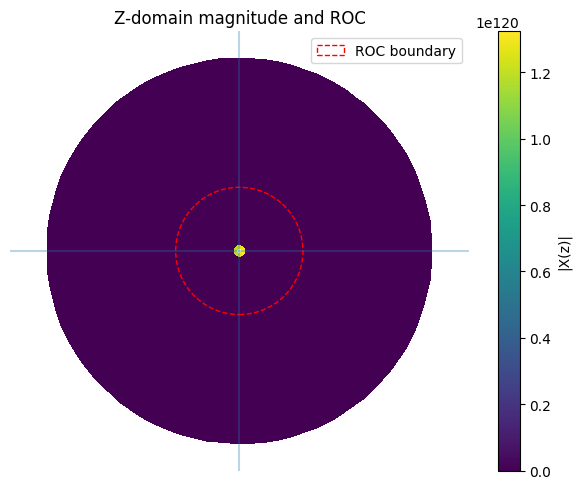

In [57]:
# Z-transform calculation
def z_transform(x_n, r, omega):
    z = r * np.exp(1j * omega)
    n = np.arange(len(x_n))
    return np.sum(x_n * z**(-n))

# Calculate Z-transform
r = np.linspace(0, 2, 50)
omega = np.linspace(0, 2*np.pi, 100)
R, Omega = np.meshgrid(r, omega)
Z = R * np.exp(1j * Omega)

# Calculate Z-transform values
X_z = np.zeros_like(Z, dtype=complex)
for i in range(len(r)):
    for j in range(len(omega)):
        X_z[j,i] = z_transform(x_n, r[i], omega[j])


plt.figure(figsize=(12, 5))

# Plot Z-domain magnitude
plt.subplot(121)
plt.pcolormesh(R*np.cos(Omega), R*np.sin(Omega), np.abs(X_z))
plt.colorbar(label='|X(z)|')
plt.axvline(x=0, linestyle='-', alpha=0.3)
plt.axhline(y=0, linestyle='-', alpha=0.3)

# Draw ROC circle
roc_circle = plt.Circle((0,0), 2/3, fill=False, color='r', linestyle='--', label='ROC boundary')
plt.gca().add_artist(roc_circle)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Z-domain magnitude and ROC')
plt.axis('equal')
plt.grid(True)
plt.legend()

plt.axis('off')

plt.tight_layout()
plt.show()